# Analysis & Visualization 

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline 

In [4]:
# Import the master dataset into dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head()

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,tweet_picture_predicted,tweet_favorites,tweet_retweets,user_followers,dog_stage,dog_breed,confidence_level,rating_numerator,dogs_count,dog_name,dog_gender
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,38298.0,8405.0,7377937.0,None,NaN,0.000000,13.0,1,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,32826.0,6196.0,7377937.0,None,Chihuahua,0.323581,13.0,1,Tilly,female
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,24720.0,4100.0,7377937.0,None,Chihuahua,0.716012,12.0,1,Archie,male
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,41631.0,8532.0,7377937.0,None,Labrador_retriever,0.168086,13.0,1,Darla,female
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,39800.0,9251.0,7377937.0,None,basset,0.555712,12.0,1,Franklin,male


In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 16 columns):
tweet_id                   7976 non-null int64
tweet_date                 7976 non-null object
tweet_source               7976 non-null object
tweet_text                 7976 non-null object
tweet_url                  7976 non-null object
tweet_picture_predicted    7976 non-null object
tweet_favorites            7972 non-null float64
tweet_retweets             7972 non-null float64
user_followers             7972 non-null float64
dog_stage                  7976 non-null object
dog_breed                  6744 non-null object
confidence_level           7976 non-null float64
rating_numerator           7976 non-null float64
dogs_count                 7976 non-null int64
dog_name                   5476 non-null object
dog_gender                 3448 non-null object
dtypes: float64(5), int64(2), object(9)
memory usage: 997.1+ KB


In [6]:
# Convert columns to the required data type

df_master['tweet_id'] = df_master['tweet_id'].astype(object)
df_master['tweet_date'] = pd.to_datetime(df_master.tweet_date)
df_master['tweet_source'] = df_master['tweet_source'].astype('category')
df_master['dog_stage'] = df_master['dog_stage'].astype('category')
df_master['dog_gender'] = df_master['dog_gender'].astype('category')

df_master = df_master.set_index('tweet_date')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7976 entries, 2017-08-01 16:23:56 to 2015-11-15 22:32:08
Data columns (total 15 columns):
tweet_id                   7976 non-null object
tweet_source               7976 non-null category
tweet_text                 7976 non-null object
tweet_url                  7976 non-null object
tweet_picture_predicted    7976 non-null object
tweet_favorites            7972 non-null float64
tweet_retweets             7972 non-null float64
user_followers             7972 non-null float64
dog_stage                  7976 non-null category
dog_breed                  6744 non-null object
confidence_level           7976 non-null float64
rating_numerator           7976 non-null float64
dogs_count                 7976 non-null int64
dog_name                   5476 non-null object
dog_gender                 3448 non-null category
dtypes: category(3), float64(5), int64(1), object(6)
memory usage: 833.8+ KB


Text(0.5,1,'Retweets and favorites Scatter plot')

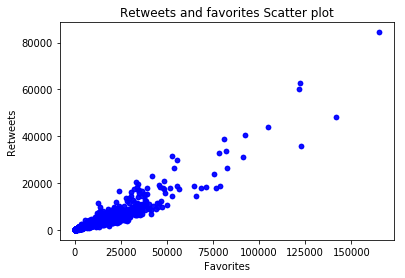

In [8]:
df_master.plot(kind = 'scatter', x = 'tweet_favorites', y = 'tweet_retweets', alpha = 0.5, color = 'blue')
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [9]:

top_retweet_count_url = df_master.tweet_url[df_master.tweet_retweets == max(df_master.tweet_retweets)][0]
print("The maximum number of retweet is: {}, for the tweet: {}".format(max(df_master.tweet_retweets), top_retweet_count_url))

top_favorites_count_url = df_master.tweet_url[df_master.tweet_favorites == max(df_master.tweet_favorites)][0]
print("The maximum number of favorites is: {}, for the tweet: {}".format(max(df_master.tweet_favorites), top_favorites_count_url))

The maximum number of retweet is: 84382.0, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1
The maximum number of favorites is: 165068.0, for the tweet: https://twitter.com/dog_rates/status/744234799360020481/video/1


Text(0,0.5,'Rating')

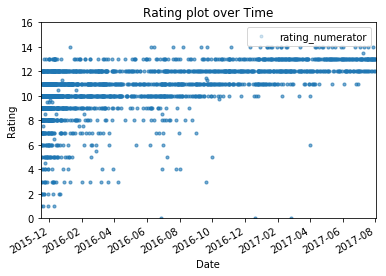

In [10]:
# Our range will be [0,16] taking of the two ouliers (1776 and 420)
df_master.plot(y ='rating_numerator', ylim=[0,16], style = '.', alpha = .2)
plt.title('Rating plot over Time')
plt.xlabel('Date')
plt.ylabel('Rating')

In [11]:
df_master[df_master['rating_numerator'] <= 14]['rating_numerator'].describe()


count    7968.000000
mean       10.545405
std         2.190394
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

Text(0,0.5,'dog_breed')

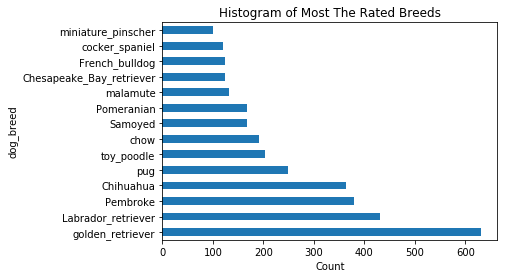

In [15]:
# Without specify the lengh we don't get good result so we will subset our data on the most owned
df_by_breed = df_master.groupby('dog_breed').filter(lambda x: len(x) >= 100.0)

df_by_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Most The Rated Breeds')
plt.xlabel('Count')
plt.ylabel('dog_breed')

Text(0.5,1,'Dog Gender Partitions')

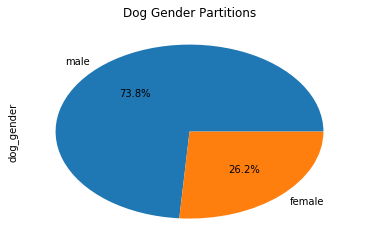

In [17]:
# Plot the data partitioned by dog gender
df_master[df_master['dog_gender'].notnull()]['dog_gender'].value_counts().plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Dog Gender Partitions')

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'')

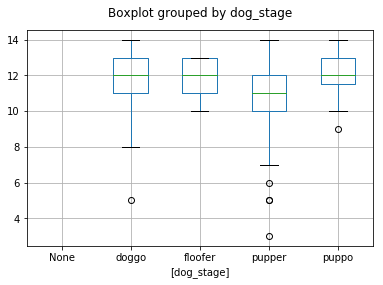

In [22]:
# Plot the dog stages with ratings
df_master[df_master['dog_stage'] != 'None'].boxplot(column = ['rating_numerator'], by = ['dog_stage'])
plt.title('')

# Conclusion

The Twitter account WeRateDogs (@dog_rates) is devoted to humorously reviewing pictures of dogs doing adorable poses. Dogs are rated on a scale of one to ten, but are invariably given ratings in excess of the maximum, such as "13/10". It has acquired over 4.50 million followers since its debut.

If you are thinking of adopting a dog, get a floof(er) - far away from being pupper at least still in the stage of puppo yet not a doggo to live more togother.